In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [9]:
plt.style.use('ggplot')
df = pd.read_pickle('cleaned_data')
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [10]:
df.view.fillna(0, inplace = True)

In [11]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3749
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
delta_lot           0
delta_living        0
dtype: int64

In [12]:
df_pred = df.drop(['id','price'], axis=1)
df_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_lot,delta_living
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.005213,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.018537,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.030675,0.037639
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063316,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.051126,-0.204786,0.024280,0.224903,0.569884,0.088303,0.118485,-0.013431
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.101943,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.055899,-0.199802,0.052155,0.241214,0.756402,0.184342,0.092753,0.062137
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.024978,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004728,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.065126,0.037390
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.018484,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003430,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.082584,-0.104694
waterfront,-0.005213,0.063316,0.101943,0.024978,0.018484,1.000000,0.346925,0.013806,0.079641,0.075770,0.070319,-0.016957,0.076154,0.016109,-0.013615,-0.021833,0.081866,0.038602,0.028127,0.016183
view,0.078354,0.186016,0.281715,0.075054,0.028414,0.346925,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.100884,0.085059,0.006321,-0.077702,0.278928,0.073083,0.033506,0.029891
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.013806,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.061451,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,-0.065411,0.064569
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.079641,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,0.016937,-0.185771,0.113575,0.200341,0.713867,0.120981,0.113895,0.001493
sqft_above,0.479386,0.686668,0.876448,0.184139,0.523989,0.075770,0.166017,-0.158904,0.756073,1.000000,-0.051175,0.424037,0.022342,-0.261570,-0.001199,0.344842,0.731767,0.195077,0.102657,0.028182


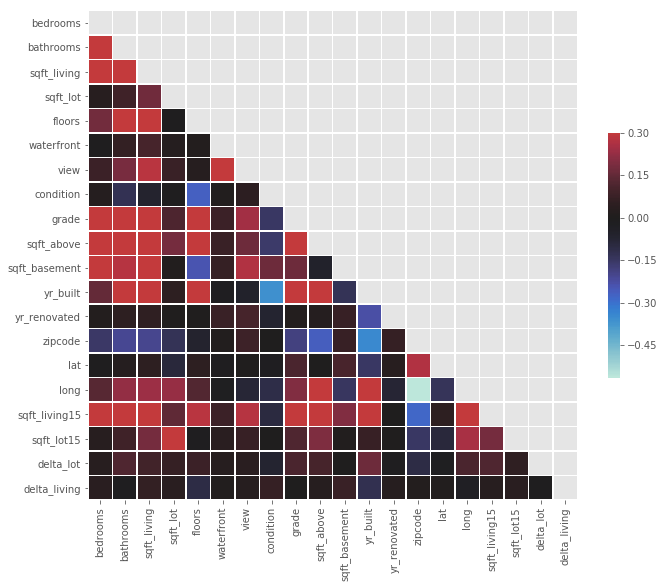

In [13]:
corr = df_pred.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

I will drop yr_renovted. It has given me much grief.

In [7]:
df.drop('yr_renovated', axis=1, inplace=True)
df_pred.drop('yr_renovated', axis=1, inplace=True)

First I normalize my data, then I do the following steps

Replace feature_cols & X
Train_test_split your data
Fit the model to linreg again using linreg.fit
Make predictions using (y_pred = linreg.predict(X_test))
Compute RMSE
Repeat until RMSE satisfactory

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DB9DCF1550>,
      dtype=object)

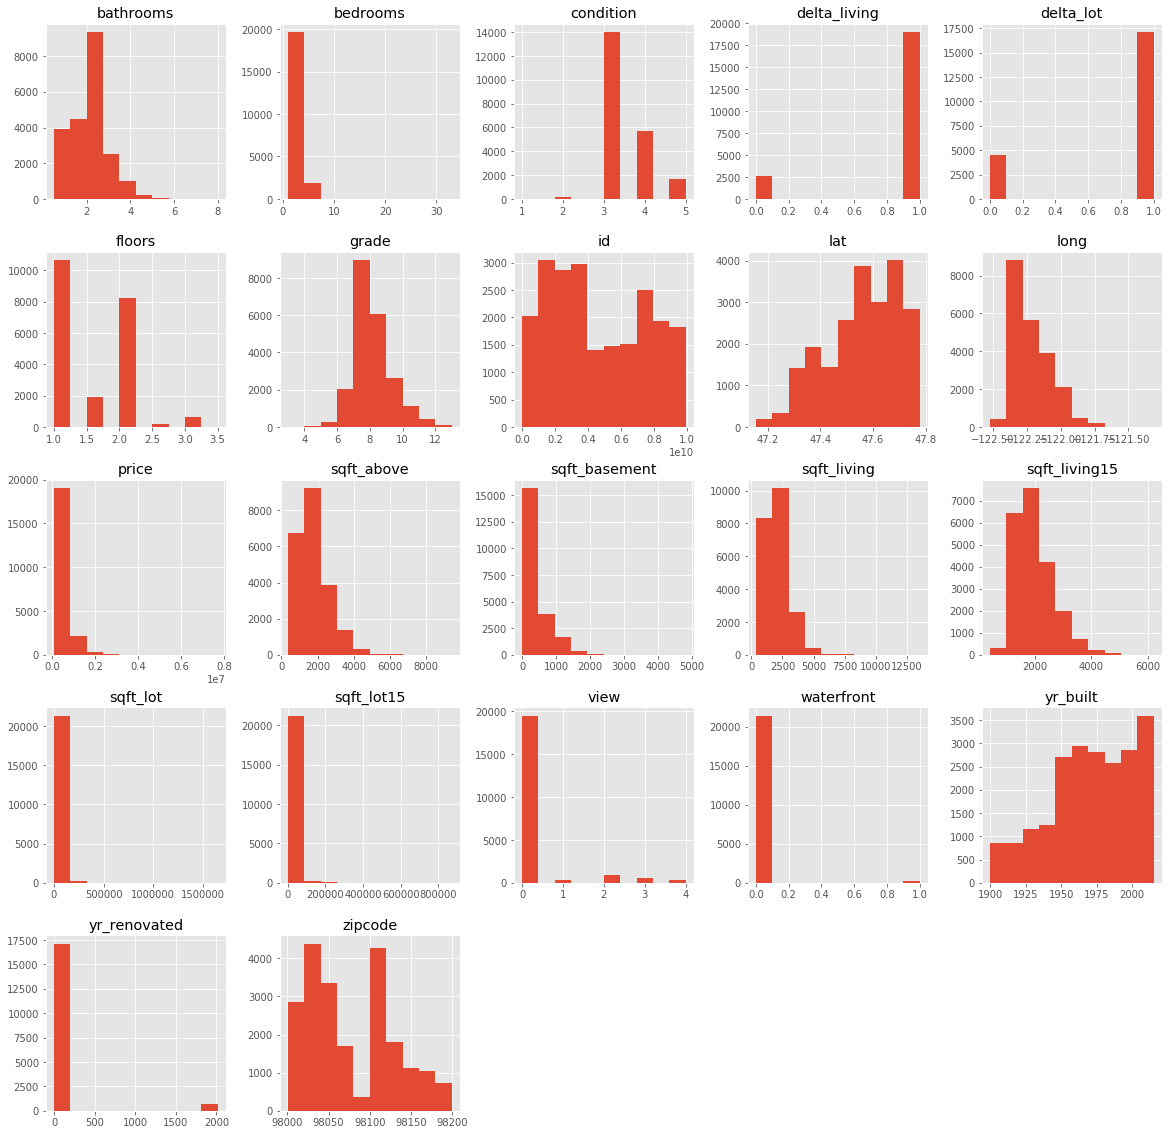

In [14]:
df.hist(figsize=(20,20))

In [111]:
df_pred.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,delta_lot,delta_living
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.009307,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,0.792842,0.881326
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.096024,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,53.513072,0.138552,0.140724,685.230472,27274.441950,0.405279,0.323412
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,1.000000,1.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,1.000000,1.000000
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,1.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000


In [38]:
log_lot15 = np.log(df_pred.sqft_lot15) #Using the the log transformation to reduce postive skewness
log_above = np.log(df_pred.sqft_above)
norm_basement = (df_pred.sqft_basement - df_pred.sqft_basement.mean()) / df_pred.sqft_basement.std() #I can't find anything that works #Basement has zero in it so we can't use log, we will use something else
log_living = np.log(df_pred.sqft_living)
log_living15 = np.log(df_pred.sqft_living15)
log_lot = np.log(df_pred.sqft_lot)

scaled_lot15 = (log_lot15-np.mean(log_lot15))/np.sqrt(np.var(log_lot15))
scaled_above = (log_above-np.mean(log_above))/np.sqrt(np.var(log_above))
#scaled_basement = (log_basement-np.mean(log_basement))/np.sqrt(np.var(log_basement))
scaled_living = (log_living-np.mean(log_living))/np.sqrt(np.var(log_living))
scaled_living15 = (log_living15-np.mean(log_living15))/np.sqrt(np.var(log_living15))
scaled_lot = (log_lot-np.mean(log_lot))/np.sqrt(np.var(log_lot))


df_pred_scaled = pd.DataFrame([])
df_pred_scaled['lot15'] = scaled_lot15
df_pred_scaled['above'] = scaled_above
df_pred_scaled['basement'] = norm_basement
df_pred_scaled['living'] = scaled_living
df_pred_scaled['living15'] = scaled_living15
df_pred_scaled['lot'] = scaled_lot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DBA1968E48>,
      dtype=object)

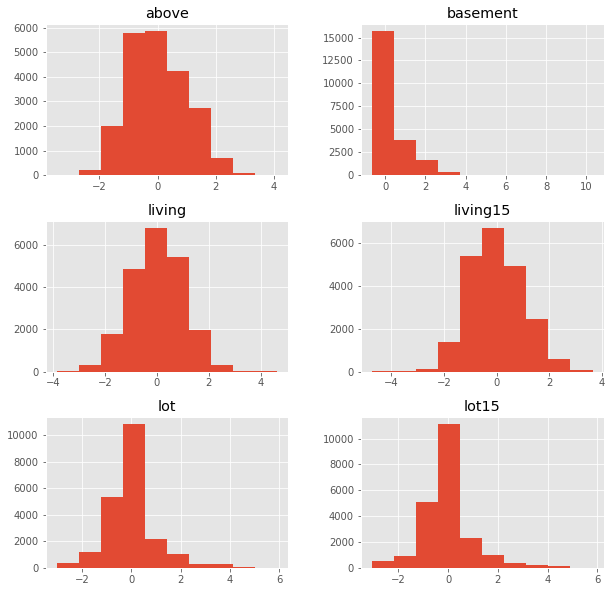

In [39]:
df_pred_scaled.hist(figsize=(10,10))

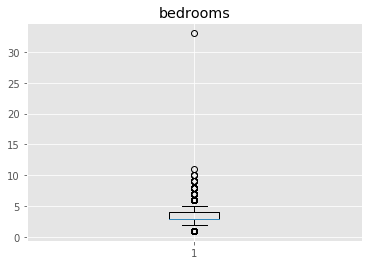

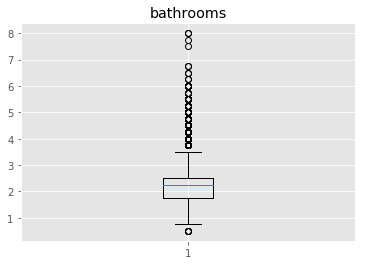

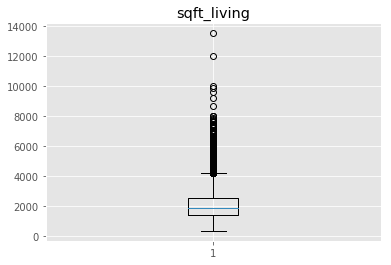

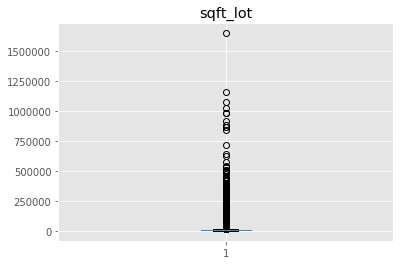

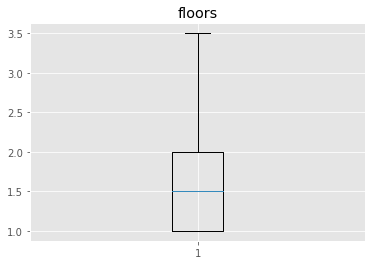

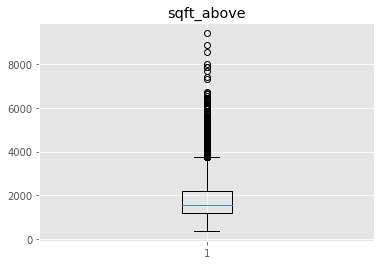

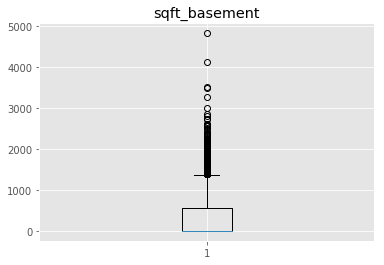

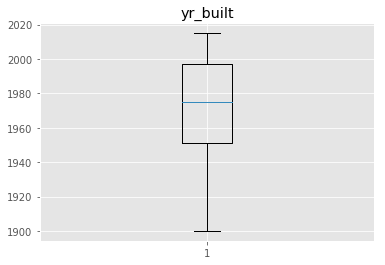

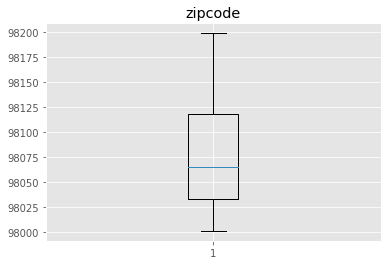

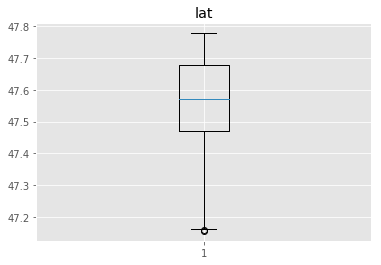

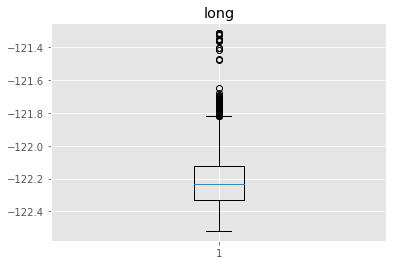

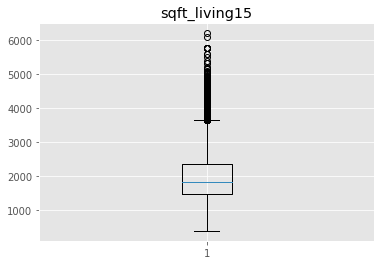

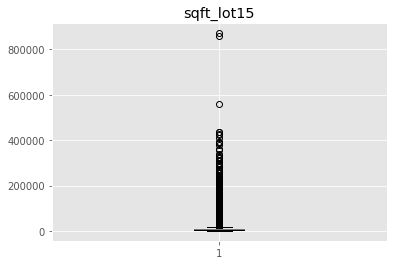

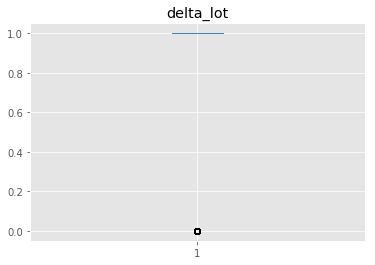

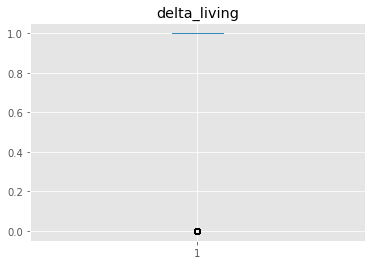

In [18]:
to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'delta_lot', 'delta_living']
for plot in to_plot:
    plt.boxplot(df_pred[plot])
    plt.title(plot)
    plt.show()

There seems to be a few outliers we have to remove. I will use the IQR to take care of them. Why? well I am really unsure. Do I do them on the standarized data or no?

In [19]:
def remove_outlier(df_in, col_names):
    df_out = pd.DataFrame([])
    for col in col_names:
        q1 = df_in[col].quantile(0.25)
        q3 = df_in[col].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[col] > fence_low) & (df_in[col] < fence_high)]
    return df_out

In [21]:
clean_up = ['sqft_living', 'sqft_lot', 'sqft_above',
       'sqft_basement', 'sqft_living15','sqft_lot15']

temp = remove_outlier(df_pred, clean_up)

In [22]:
temp.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,delta_lot,delta_living
count,19409.000000,19409.000000,19409.000000,1.940900e+04,19409.00000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,16026.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000,19409.000000
mean,3.354990,2.081560,2001.165181,8.265774e+03,1.48985,0.005874,0.208718,3.409398,7.574888,1713.444897,281.894430,1970.152661,79.104393,98080.833891,47.562426,-122.227519,1919.805657,7252.811273,0.782111,0.877067
std,0.930059,0.750262,843.044205,1.471656e+04,0.54478,0.076416,0.715491,0.652968,1.098259,754.193797,425.353904,30.105801,389.471033,54.136733,0.136113,0.132116,637.407294,3226.475376,0.412822,0.328368
min,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.503000,620.000000,651.000000,0.000000,0.000000
25%,3.000000,1.500000,1400.000000,4.950000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1950.000000,0.000000,98033.000000,47.480600,-122.334000,1460.000000,5000.000000,1.000000,1.000000
50%,3.000000,2.250000,1850.000000,7.210000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1972.000000,0.000000,98074.000000,47.573200,-122.262000,1780.000000,7265.000000,1.000000,1.000000
75%,4.000000,2.500000,2440.000000,9.576000e+03,2.00000,0.000000,0.000000,4.000000,8.000000,2100.000000,540.000000,1998.000000,0.000000,98118.000000,47.678600,-122.151000,2260.000000,9128.000000,1.000000,1.000000
max,33.000000,8.000000,12050.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,13.000000,8570.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,17550.000000,1.000000,1.000000


Lets finally take care of our catigorial data.

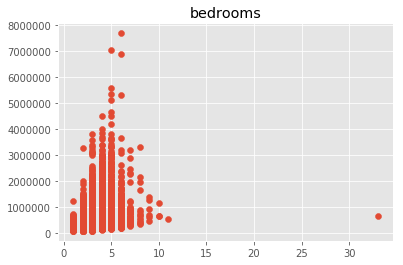

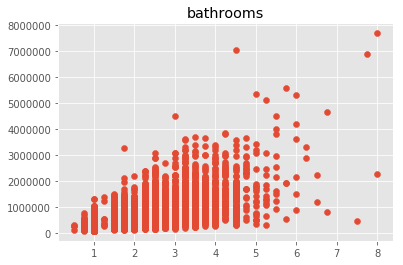

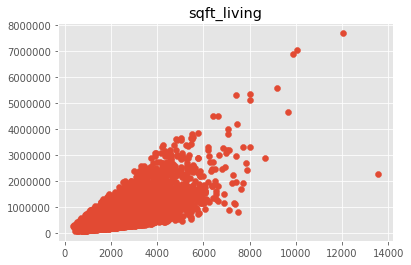

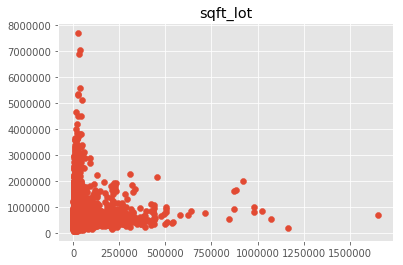

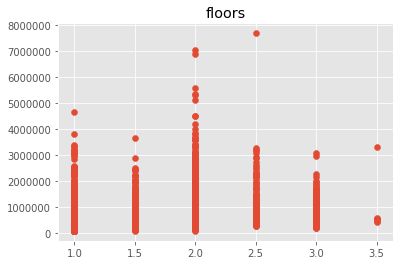

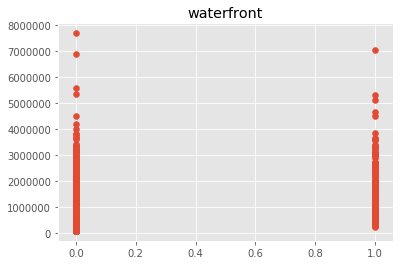

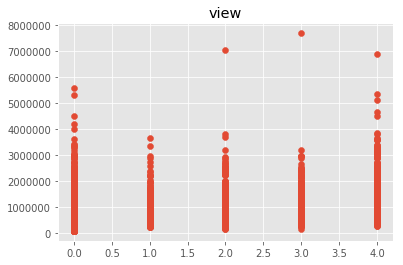

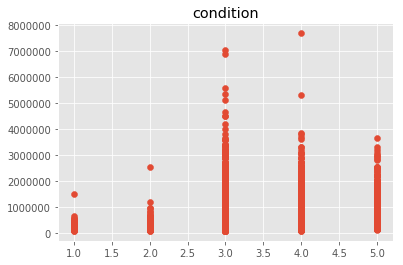

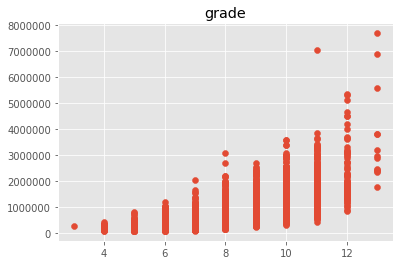

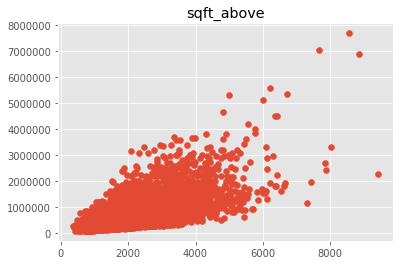

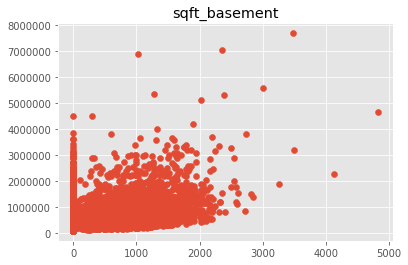

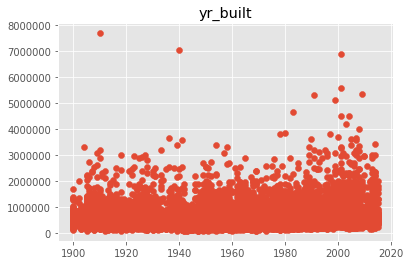

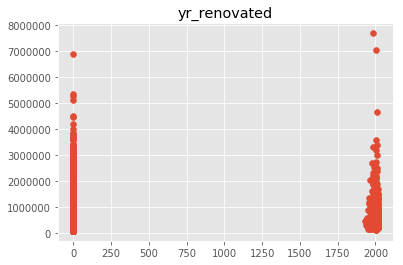

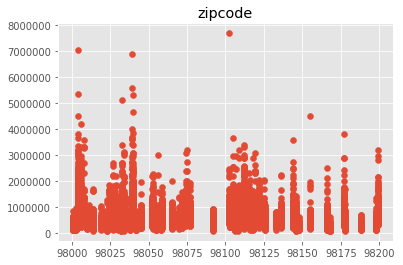

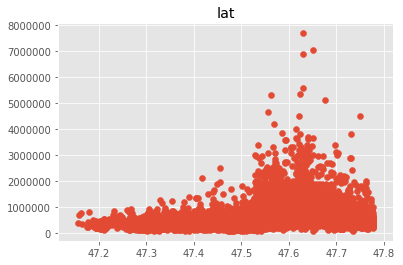

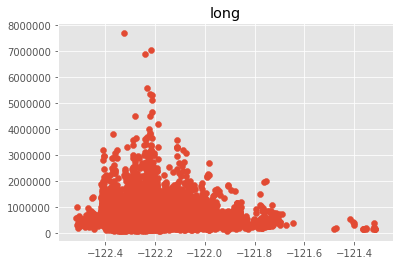

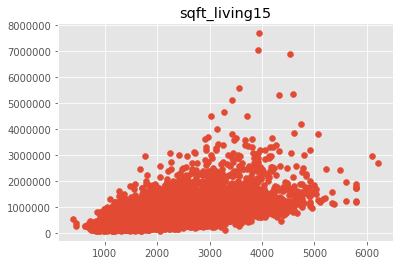

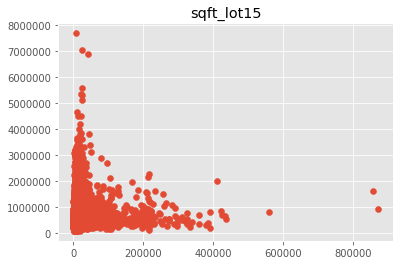

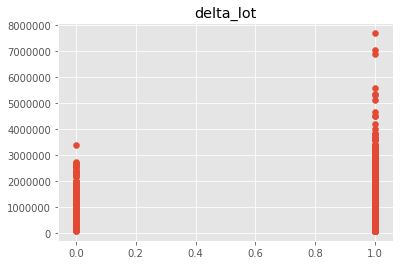

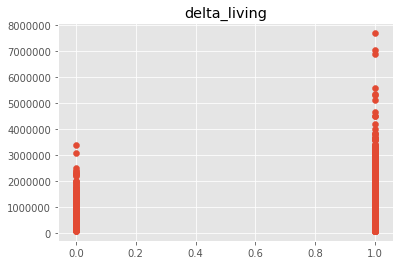

In [46]:
scatter = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'delta_lot',
       'delta_living']
price = df.price
for scatt in scatter:
    plt.scatter(y=price,x= df[scatt])
    plt.title(scatt)
    plt.show()